# 1.数据集整理

## 1.1 下载

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!wget -P /content/drive/MyDrive/OpenMMLab/BDD100kPR https://archive.org/download/bdd100k/bdd100k_seg.zip

外网下载到外网的服务器就是快，1.22G的数据，差不多每秒40MB，29s就下载完了

In [ ]:
!wget -P /content/drive/MyDrive/OpenMMLab/BDD100kPR https://bdd-data-storage-release.s3.us-west-2.amazonaws.com/bdd100k/2021/bdd100k_images_10k.zip

来自：<https://github.com/MasterBin-IIAU/UNINEXT/blob/master/conversion/download_bdd.py>

In [ ]:
!wget -P /content/drive/MyDrive/OpenMMLab/BDD100kPR  https://bdd-data-storage-release.s3.us-west-2.amazonaws.com/bdd100k/2021/bdd100k_sem_seg_labels_trainval.zip

# https://bdd-data-storage-release.s3.us-west-2.amazonaws.com/bdd100k/2021/bdd100k_sem_seg_labels_trainval.zip

## 1.2 解压

```python
import os
os.makedirs("/content/bdd10k/images",exist_ok=True)
os.makedirs("/content/bdd10k/labels",exist_ok=True)
```

In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_images_10k.zip

In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_sem_seg_labels_trainval.zip

## 1.3 查看数据

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [7]:
import matplotlib
from matplotlib.colors import ListedColormap
import numpy as np

rgb=np.array([[128, 64, 128],[244, 35, 232],[70, 70, 70],[102, 102, 156],[190, 153, 153],[153, 153, 153],[250, 170, 30],[220, 220, 0],
    [107, 142, 35],[152, 251, 152],[70, 130, 180],[220, 20, 60],[255, 0, 0],[0, 0, 142],[0, 0, 70],[0, 60, 100],[0, 80, 100],[0, 0, 230],[119, 11, 32]])/255.0
rgb_c=np.zeros((256,3))
# 0-255,cmap是256种颜色
for i in range(19):
  rgb_c[i]=rgb[i]
print(rgb_c[:2])
bdd_cmap = ListedColormap(rgb_c)

[[0.50196078 0.25098039 0.50196078]
 [0.95686275 0.1372549  0.90980392]]


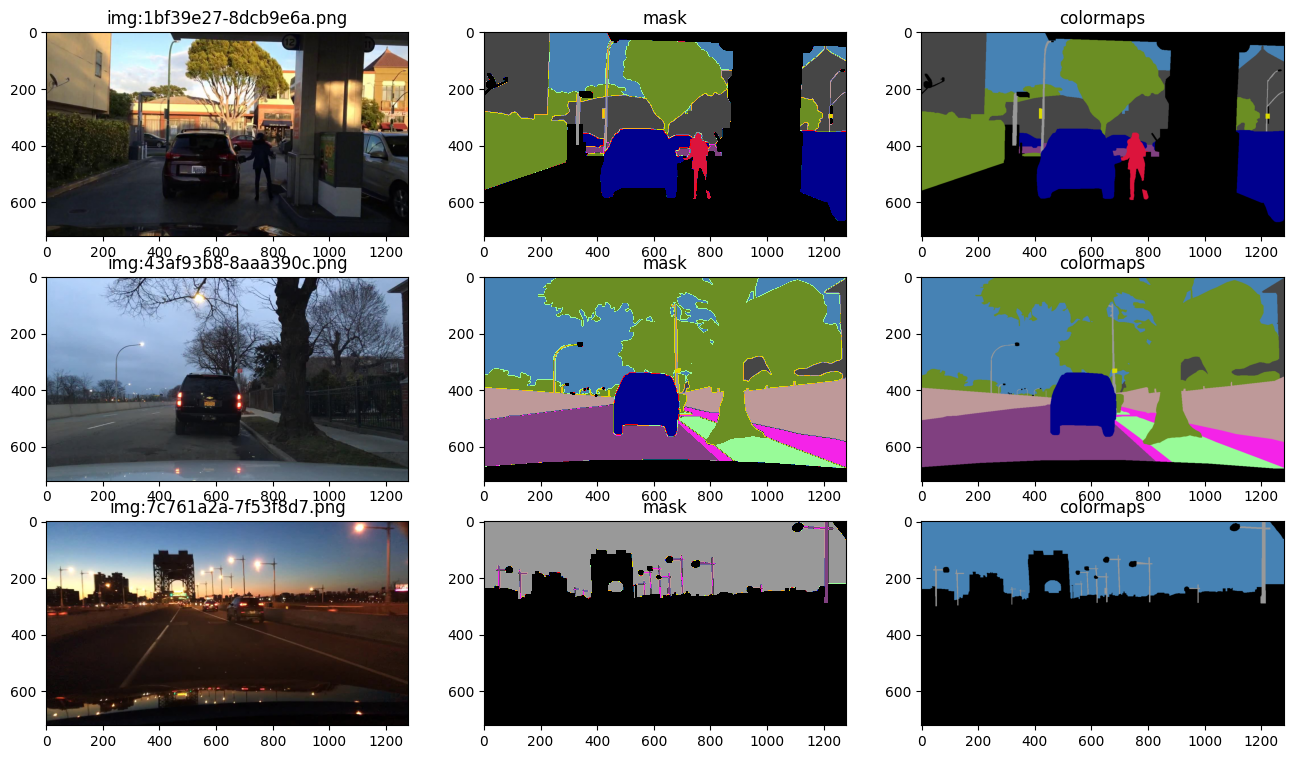

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_dir = "/content/bdd100k/images/10k"
img_data_type = "train"

label_dir = "/content/bdd100k/labels/sem_seg"
masks_type = "masks/train"
colormaps_type="colormaps/train"

img_base_path = os.path.join(img_dir,img_data_type)
mask_base_path = os.path.join(label_dir,masks_type)
colormaps_base_path = os.path.join(label_dir,colormaps_type)

img_name_list = os.listdir(img_base_path)
plt.figure(figsize=(16,9))
num=0
for img_name in img_name_list[683:686]:
  img_path = os.path.join(img_base_path,img_name)

  mask_name = img_name.split(".")[0]+".png"
  mask_path = os.path.join(mask_base_path,mask_name)

  colormaps_name = mask_name
  colormaps_path = os.path.join(colormaps_base_path,mask_name)

  img = cv2.imread(img_path)
  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  colormaps = cv2.imread(colormaps_path)

  plt.subplot(3,3,3*num+1)
  plt.title(f"img:{mask_name}")
  plt.imshow(img[:,:,::-1])

  plt.subplot(3,3,3*num+2)
  plt.title("mask")
  plt.imshow(mask,cmap=bdd_cmap)

  plt.subplot(3,3,3*num+3)
  plt.title("colormaps")
  plt.imshow(colormaps[:,:,::-1])
  num+=1


In [23]:
# 为了说明vmin和vmax的区别，要找一个mask最大值不是255的，
# 即不包含未标注内容的图像，很少，要找找
for i,img_name in enumerate(img_name_list[300:1000]):
  mask_name = img_name.split(".")[0]+".png"
  mask_path = os.path.join(mask_base_path,mask_name)
  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  unique = np.unique(mask)
  if 255 not in unique:
    print(f"i = {i}, img_name = {img_name}, unique = {unique}")

i = 653, img_name = 1f77fb7b-d1d8dfee.jpg, unique = [ 0  1  2  5  7  8  9 10 13]
i = 683, img_name = 2bf8c28c-acd5d2a0.jpg, unique = [ 0  1  2  3  4  5  7  8 10 14]


对比上下可以看出来，对于`2bf8c28c-acd5d2a0.jpg`来说，由于其最大值并不是255，所以必须手动指定vmin和vmax。

在规定好colormap之后，更重要的反而是vmin和vmax




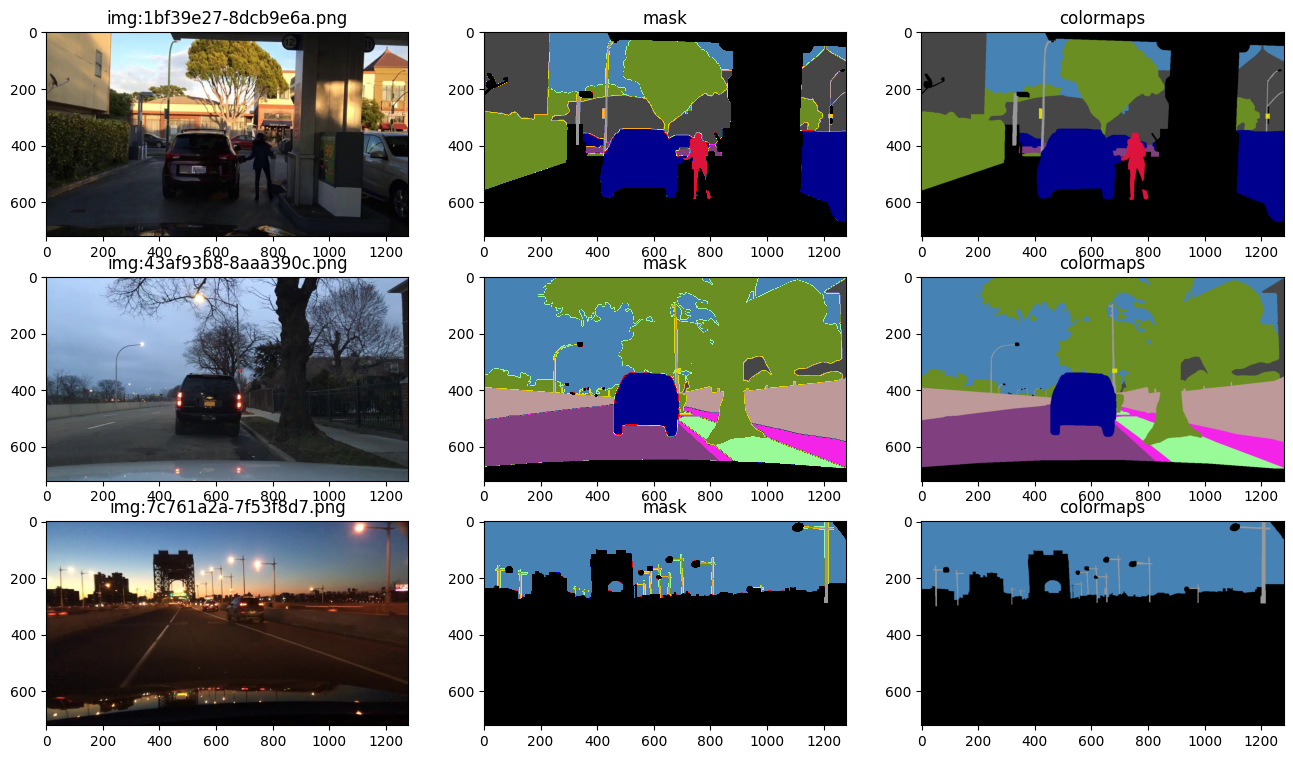

In [22]:
plt.figure(figsize=(16,9))
num=0
for img_name in img_name_list[683:686]:
  img_path = os.path.join(img_base_path,img_name)

  mask_name = img_name.split(".")[0]+".png"
  mask_path = os.path.join(mask_base_path,mask_name)

  colormaps_name = mask_name
  colormaps_path = os.path.join(colormaps_base_path,mask_name)

  img = cv2.imread(img_path)
  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  colormaps = cv2.imread(colormaps_path)

  plt.subplot(3,3,3*num+1)
  plt.title(f"img:{mask_name}")
  plt.imshow(img[:,:,::-1])

  plt.subplot(3,3,3*num+2)
  plt.title("mask")
  plt.imshow(mask,cmap=bdd_cmap,vmin=0,vmax=255)

  plt.subplot(3,3,3*num+3)
  plt.title("colormaps")
  plt.imshow(colormaps[:,:,::-1])
  num+=1

In [ ]:
import numpy as npa
for img_name in ["00054602-3bf57337.jpg",]:

  img_path = os.path.join(img_base_path,img_name)
  img = cv2.imread(img_path)

  mask_name = img_name.split(".")[0]+".png"
  mask_path = os.path.join(mask_base_path,mask_name)

  colormaps_name = mask_name
  colormaps_path = os.path.join(colormaps_base_path,mask_name)

  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  colormaps = cv2.imread(colormaps_path)

  plt.subplot(1,3,1)
  plt.title("img")
  plt.imshow(img[:,:,::-1])

  plt.subplot(1,3,2)
  plt.title("mask")
  plt.imshow(mask,cmap=bdd_cmap)

  plt.subplot(1,3,3)
  plt.title("colormaps")
  plt.imshow(colormaps[:,:,::-1])

所以这个数据和之前遇到的差不多，colormaps就是显示的彩色图，mask就是index索引的

## 1.4 标签值和颜色值对应（是否与citespaces一致）

在[mmsegmentation/mmseg/datasets
/cityscapes.py](https://github.com/open-mmlab/mmsegmentation/blob/main/mmseg/datasets/cityscapes.py)中，有：

```python
 METAINFO = dict(
        classes=('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
                 'traffic light', 'traffic sign', 'vegetation', 'terrain',
                 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train',
                 'motorcycle', 'bicycle'),
        palette=[[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
                 [190, 153, 153], [153, 153, 153], [250, 170,
                                                    30], [220, 220, 0],
                 [107, 142, 35], [152, 251, 152], [70, 130, 180],
                 [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70],
                 [0, 60, 100], [0, 80, 100], [0, 0, 230], [119, 11, 32]])
```

BDD在类别上，0-18对应的语义与cityscapes一致，但是颜色定义一样吗。。。

In [ ]:
import numpy as np
for img_name in img_name_list[:1]:

  mask_name = img_name.split(".")[0]+".png"
  mask_path = os.path.join(mask_base_path,mask_name)

  colormaps_name = mask_name
  colormaps_path = os.path.join(colormaps_base_path,mask_name)

  mask = cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  colormaps = cv2.imread(colormaps_path)

  mask_gray, gray_counts= np.unique(mask,return_counts=True)
  print(f"mask_gray {mask_gray},len={len(mask_gray)}, counts={gray_counts}")

  colormaps_color,color_counts = np.unique(colormaps.reshape(-1,3),axis=0,return_counts=True)
  print(f"colormaps_color {colormaps_color},len={len(colormaps_color)},counts={color_counts} \n---")

很明显，BDD的颜色定义和cityscapes不一致。同时在打印出的结果里可以看到：
+ 0（road）对应的颜色应该是(0,0,0)
+ 1对应的颜色应该是[220,200,0]

根据[bdd100k/bdd100k/label
/label.py](https://github.com/bdd100k/bdd100k/blob/master/bdd100k/label/label.py)，就可以找出每个类别对应的颜色值了

**id**|**label**|**color**
:-----:|:-----:|:-----:
0|road|[128, 64, 128]
1|sidewalk|[244, 35, 232]
2|building|[70, 70, 70]
3|wall|[102, 102, 156]
4|fence|[190, 153, 153]
5|pole|[153, 153, 153]
6|traffic light|[250, 170, 30]
7|traffic sign|[220, 220, 0]
8|vegetation|[107, 142, 35]
9|terrain|[152, 251, 152]
10|sky|[70, 130, 180]
11|person|[220, 20, 60]
12|rider|[255, 0, 0]
13|car|[0, 0, 142]
14|truck|[0, 0, 70]
15|bus|[0, 60, 100]
16|train|[0, 80, 100]
17|motorcycle|[0, 0, 230]
18|bicycle|[119, 11, 32]

In [ ]:
import matplotlib
from matplotlib.colors import ListedColormap

bdd_cmap = ListedColormap([
    [128, 64, 128],[244, 35, 232],[70, 70, 70],[102, 102, 156],
    [190, 153, 153],[153, 153, 153],[250, 170, 30],[220, 220, 0],
    [107, 142, 35],[152, 251, 152],[70, 130, 180],[220, 20, 60],
    [255, 0, 0],[0, 0, 142],[0, 0, 70],[0, 60, 100],[0, 80, 100],
    [0, 0, 230],[119, 11, 32],[0,0,0]
    ],N=20)


# 2. MMSegmentation

## 2.0 安装环境

In [ ]:
!pip3 install install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
!pip install openmim
!mim install 'mmengine'

In [ ]:
!wget https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl
!pip install mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl

In [ ]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

Pytorch 版本 1.11.0+cu113
CUDA 是否可用 True
MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 GCC 9.3


In [ ]:
!git clone https://github.com/CastleDream/mmsegmentation.git
!cd /content/mmsegmentation && pip install -v -e .

## 2.0-2 加载数据

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_images_10k.zip -d /content

In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_sem_seg_labels_trainval.zip -d /content

## 2.1 注册数据集

In [ ]:
bdd100k = """
from mmseg.registry import DATASETS
from .basesegdataset import BaseSegDataset

@DATASETS.register_module()
class BDD100KDataset(BaseSegDataset):
    METAINFO = dict(
        classes=('road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
                 'traffic light', 'traffic sign', 'vegetation', 'terrain',
                 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train',
                 'motorcycle', 'bicycle'),
        palette=[ [128, 64, 128],[244, 35, 232],[70, 70, 70],[102, 102, 156],
                [190, 153, 153],[153, 153, 153],[250, 170, 30],[220, 220, 0],
                [107, 142, 35],[152, 251, 152],[70, 130, 180],[220, 20, 60],
                [255, 0, 0],[0, 0, 142],[0, 0, 70],[0, 60, 100],[0, 80, 100],
                [0, 0, 230],[119, 11, 32]])

    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False,
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)
"""
bdd100k_save_path = "/content/mmsegmentation/mmseg/datasets/bdd100k.py"
with open(bdd100k_save_path,'w') as f:
  f.write(bdd100k)

记得修改`__init__.py`

## 2.2 配置文件

用这个比较小的测试
+ <https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_512x1024_80k_cityscapes/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth>
+ <https://github.com/open-mmlab/mmsegmentation/blob/master/configs/pspnet/pspnet_r18-d8_512x1024_80k_cityscapes.py>


| | | | | | | |  |
|--|---|---|---|---|---|---|---|
|PSPNet	|R-18-D8	|512x1024	|80000	|1.7	|15.71	|74.87	|76.04|

In [ ]:
!rm -rf model
import os
os.makedirs("model",exist_ok=True)

In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_512x1024_80k_cityscapes/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth \
-P model/

--2023-06-30 09:26:27--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_512x1024_80k_cityscapes/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.209, 8.48.85.213, 8.48.85.210, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51240926 (49M) [application/octet-stream]
Saving to: ‘model/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth’

pspnet_r18-d8_512x1 100%[===================>]  48.87M  30.1MB/s    in 1.6s    

2023-06-30 09:26:29 (30.1 MB/s) - ‘model/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth’ saved [51240926/51240926]



In [ ]:
!rm -rf /content/mmsegmentation/data

In [ ]:
# 对数据集建立软连接
import os
os.makedirs("mmsegmentation/data/bdd100k",exist_ok=True)

In [ ]:
!ln -s bdd100k/  mmsegmentation/data/bdd100k/

In [ ]:
bddConfig="""
_base_ = './pspnet_r50-d8_4xb2-80k_cityscapes-512x1024.py'
model = dict(
    pretrained='/content/model/pspnet_r18-d8_512x1024_80k_cityscapes_20201225_021458-09ffa746.pth',
    backbone=dict(depth=18),
    decode_head=dict(
        in_channels=512,
        channels=128,
    ),
    auxiliary_head=dict(in_channels=256, channels=64))

train_dataloader = dict(
    dataset=dict(
        type='BDD100KDataset',
        data_root='bdd100k',
        data_prefix=dict(img_path='images/10k/train', seg_map_path='labels/sem_seg/masks/train'),
    )
)
val_dataloader = dict(
    dataset=dict(
        type='BDD100KDataset',
        data_root='bdd100k',
        data_prefix=dict(img_path='images/10k/val', seg_map_path='labels/sem_seg/masks/val'),
    )
)
test_dataloader = val_dataloader
train_cfg = dict(type='IterBasedTrainLoop', max_iters=1000, val_interval=20)
default_hooks = dict(
    logger=dict(type='LoggerHook', interval=10, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', by_epoch=False, interval=100),)
"""

config_file_path = '/content/mmsegmentation/configs/pspnet/bdd100k_part.py'
with open(config_file_path,'w') as f:
  f.write(bddConfig)

In [ ]:
from mmengine import Config
cfg = Config.fromfile(config_file_path)
full_cfg_config = '/content/bdd100k_full.py'
cfg.dump(full_cfg_config)

## 2.3 训练

In [ ]:
!python /content/mmsegmentation/tools/train.py \
/content/bdd100k_full.py\
--work-dir /content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K

bdd100k
  images
    10k
      test
      train
      val
  labels
    sem_seg
      colormaps
      masks
      polygons
      rles

## 2.4 推理测试

In [ ]:
!python /content/mmsegmentation/tools/test.py \
/content/bdd100k_full.py\
/content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K/iter_1000.pth \
--work-dir /content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K

In [ ]:
!pip install "mmsegmentation>=1.0.0"

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

config_path = '/content/bdd100k_full.py'
checkpoint_path = '/content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K/iter_1000.pth'
img_path = '/content/bdd100k/images/10k/test/ac517380-00000000.jpg'


# build the model from a config file and a checkpoint file
model = init_model(config_path, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)

# display the segmentation result
vis_image = show_result_pyplot(model, img_path, result,save_dir="/content/drive/MyDrive/OpenMMLab/BDD100kPR/infer_rs/")

In [ ]:
!sudo apt-get install tree

In [ ]:
!tree -L 4 bdd100k/ --filelimit=10

bdd100k/
├── images
│   └── 10k
│       ├── test [2000 entries exceeds filelimit, not opening dir]
│       ├── train [7000 entries exceeds filelimit, not opening dir]
│       └── val [1000 entries exceeds filelimit, not opening dir]
└── labels
    └── sem_seg
        ├── colormaps
        │   ├── train
        │   └── val
        ├── masks
        │   ├── train
        │   └── val
        ├── polygons
        │   ├── sem_seg_train.json
        │   └── sem_seg_val.json
        └── rles
            ├── sem_seg_train.json
            └── sem_seg_val.json

15 directories, 4 files


# 验证自己的PR

In [ ]:
!git clone https://github.com/CastleDream/mmsegmentation.git -b CastleDream/support_BDD100K

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 13176, done.
remote: Counting objects: 100% (380/380), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 13176 (delta 148), reused 240 (delta 119), pack-reused 12796
Receiving objects: 100% (13176/13176), 18.97 MiB | 32.37 MiB/s, done.
Resolving deltas: 100% (9679/9679), done.


In [ ]:
!cd mmsegmentation && pip install -v -e .

In [ ]:
!pip install openmim

In [ ]:
!mim install 'mmcv'

In [ ]:
!pip install 'mmengine'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/mmsegmentation/projects',
 '/content/mmsegmentation/projects/bdd100k_dataset/mmseg/datasets',
 'mmsegmentation/projects']

In [ ]:
sys.path.append('/content/mmsegmentation')

In [ ]:
from mmengine import Config

cfg =Config.fromfile("/content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K/bdd100k_full.py")
# cfg = Config.fromfile("/content/mmsegmentation/projects/bdd100k_dataset/configs/pspnet_r50-d8_4xb2-80k_bdd100k-512x1024.py")
full_cfg_config = 'bdd100k_full.py'
cfg.dump(full_cfg_config)

In [ ]:
import os
os.makedirs("data",exist_ok=True)

In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_images_10k.zip -d data/
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_sem_seg_labels_trainval.zip -d data/

In [ ]:
!pip install mmsegmentation

In [ ]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules
import matplotlib
from matplotlib.colors import ListedColormap
import numpy as np


rgb=np.array([[128, 64, 128],[244, 35, 232],[70, 70, 70],[102, 102, 156],[190, 153, 153],[153, 153, 153],[250, 170, 30],[220, 220, 0],
    [107, 142, 35],[152, 251, 152],[70, 130, 180],[220, 20, 60],[255, 0, 0],[0, 0, 142],[0, 0, 70],[0, 60, 100],[0, 80, 100],[0, 0, 230],[119, 11, 32]])
rgb_c=np.zeros((256,3))
# 0-255,cmap是256种颜色
for i in range(19):
  rgb_c[i]=rgb[i]/255.0
bdd_cmap = ListedColormap(rgb_c)

register_all_modules(init_default_scope=False)
# runner = Runner.from_cfg(cfg)

from mmseg.apis import init_model, inference_model, show_result_pyplot
checkpoint_path = '/content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K/iter_1000.pth'
model = init_model(cfg, checkpoint_path, 'cpu')

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K/iter_1000.pth


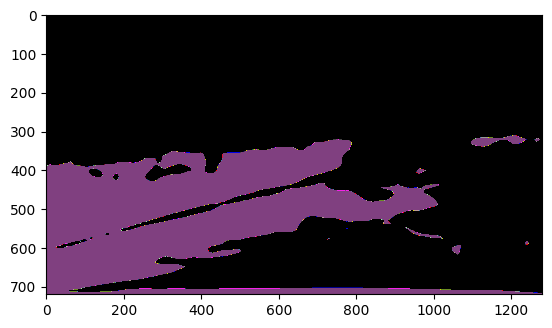

In [ ]:
val_single_path = '/content/data/bdd100k/images/10k/train/00054602-3bf57337.jpg'
result = inference_model(model, val_single_path)
# vis_image = show_result_pyplot(model, img_path, result,save_dir="/content/drive/MyDrive/OpenMMLab/BDD100kPR/infer_rs/")

pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
plt.imshow(pred_mask,cmap=bdd_cmap)

# 验证自己的PR2

## 安装

In [ ]:
!pip3 install install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install openmim
!mim install 'mmengine'
!wget https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl
!pip install mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl

In [ ]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

Pytorch 版本 1.11.0+cu113
CUDA 是否可用 True
MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 GCC 9.3


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/CastleDream/mmsegmentation.git -b CastleDream/ADD_BDD100K
# !cd /content/mmsegmentation && pip install -v -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 14143, done.
remote: Counting objects: 100% (1276/1276), done.
remote: Compressing objects: 100% (720/720), done.
remote: Total 14143 (delta 640), reused 935 (delta 475), pack-reused 12867
Receiving objects: 100% (14143/14143), 21.05 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (10190/10190), done.


In [ ]:
with open('/content/mmsegmentation/projects/bdd100k_dataset/configs/_base_/datasets/bdd100k.py','r') as f:
  line = f.readlines()
for i in line:
  print(i)

## 数据

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.makedirs("mmsegmentation/data/",exist_ok=True)

In [ ]:
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_images_10k.zip -d mmsegmentation/data/
!unzip /content/drive/MyDrive/OpenMMLab/BDD100kPR/bdd100k_sem_seg_labels_trainval.zip -d mmsegmentation/data/

In [ ]:
!sudo apt-get install tree

In [ ]:
!tree -L 6 mmsegmentation/data --filelimit=10

mmsegmentation/data
└── bdd100k
    ├── images
    │   └── 10k
    │       ├── test [2000 entries exceeds filelimit, not opening dir]
    │       ├── train [7000 entries exceeds filelimit, not opening dir]
    │       └── val [1000 entries exceeds filelimit, not opening dir]
    └── labels
        └── sem_seg
            ├── colormaps
            │   ├── train [7000 entries exceeds filelimit, not opening dir]
            │   └── val [1000 entries exceeds filelimit, not opening dir]
            ├── masks
            │   ├── train [7000 entries exceeds filelimit, not opening dir]
            │   └── val [1000 entries exceeds filelimit, not opening dir]
            ├── polygons
            │   ├── sem_seg_train.json
            │   └── sem_seg_val.json
            └── rles
                ├── sem_seg_train.json
                └── sem_seg_val.json

16 directories, 4 files


## 训练

In [ ]:
%cd /content/mmsegmentation
!python tools/train.py projects/bdd100k_dataset/configs/pspnet_r50-d8_4xb2-80k_bdd100k-512x1024.py\
--work-dir /content/drive/MyDrive/OpenMMLab/workdir/PSPNet_BDD100K_PR_Dev

/content/mmsegmentation
07/02 11:36:12 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 107813166
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.11.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-genc